In [1]:
import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork, StaticTempNetwork

import pickle

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotx

from scipy.sparse import (lil_matrix, dok_matrix, diags, eye, isspmatrix_csr, isspmatrix,
                          csr_matrix, coo_matrix, csc_matrix)
from scipy.sparse.linalg import eigsh
from scipy.linalg import logm as d_logm

from SparseStochMat import sparse_autocov_mat



import compute_vNS

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
net_heat = ContTempNetwork.load('fig3_growing_network300')
folder = '//scratch/tmp/180/skoove/growing_experiment300_temporal_heat/'

lambdas = np.logspace(-3,1,200)
lamda = lambdas[-1]

with open(folder + f'TvNS/T{lamda:.11f}', 'rb') as f:
    dict_T = pickle.load(f)



In [3]:
vNS = compute_vNS.compute_vonNeumann_entropy(net=net_heat, list_T=dict_T['T'], lamda=lamda,
                                    force_csr=True,
                                    time_domain= [len(net_heat.times)-2]) #list(np.arange(0, len(net_heat.times), 10)))

spectral_vNS = compute_vNS.compute_spectral_vonNeumann_entropy(net=net_heat, list_T=dict_T['T'], lamda=lamda,
                                    force_csr=True,
                                    time_domain= [len(net_heat.times)-2]) #list(np.arange(0, len(net_heat.times), 10)))

print(vNS)
print(spectral_vNS)

logm result may be inaccurate, approximate err = 5.054055507778083e-12
{'10.00000000000': [(9.804567083899175e-06+7.116109165634816e-07j)]}
{'10.00000000000': [0.3129553588059722]}


/home/b/skoove/Desktop/entropy/entropy_env/lib/python3.10/site-packages/scipy/linalg/_matfuncs_inv_ssq.py:836: LogmNearlySingularWarning: The logm input matrix may be nearly singular.
  warnings.warn(near_singularity_msg, LogmNearlySingularWarning)


In [4]:
T = dict_T['T'][-2].toarray()
print(T)
print(np.trace(T))

[[0.00535645 0.0100241  0.01520354 ... 0.0102626  0.01473816 0.01472443]
 [0.00535645 0.0100241  0.01520354 ... 0.0102626  0.01473816 0.01472443]
 [0.00535645 0.0100241  0.01520354 ... 0.0102626  0.01473816 0.01472443]
 ...
 [0.00535651 0.01002419 0.01520367 ... 0.01026243 0.01473792 0.01472419]
 [0.00535651 0.01002419 0.01520367 ... 0.01026243 0.01473792 0.01472419]
 [0.00535651 0.01002419 0.01520367 ... 0.01026243 0.01473792 0.01472419]]
1.0000033372323194


In [15]:
eigs = np.linalg.eigvals(T)
eigs1 = eigs / np.trace(T)
eigs1 = np.where(eigs1 > 0, eigs1, 1)
eigs2 = np.where(eigs > 0, eigs, 0)
print(eigs2.sum())
eigs2 = eigs2 / eigs2.sum()
#eigs2 = np.where(eigs2 > 0, eigs2, 1)

print(eigs1.real)
print(eigs2.real)

(1.0000043326345878+0j)
[9.99996663e-01 4.33262013e-06 1.00000000e+00 1.01911012e-16
 1.65755430e-16 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 5.74603099e-17 5.95648867e-17 2.70849780e-17
 2.70849780e-17 1.00000000e+00 1.00000000e+00 1.46684265e-17
 1.46684265e-17 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 2.28890227e-17 2.28890227e-17
 1.00000000e+00 1.00000000e+00 7.07919611e-18 7.07919611e-18
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.08240311e-17
 1.08240311e-17 1.00000000e+00 1.00000000e+00 1.03777445e-17
 2.50369005e-18 2.50369005e-18 1.00000000e+00 3.23811402e-22
 2.95409005e-24 1.00000000e+00 1.00000000e+00 3.15551932e-32
 3.15551932e-32 2.65026955e-32 2.05590146e-32 1.00000000e+00
 1.00000000e+00 1.42948326e-32 1.00000000e+00 1.00000000e+00
 1.00000000e+00 8.25869621e-34 8.25869621e-34 2.46579332e-33
 2.46579332e-33 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 4.26440597e-48 4.26440597e-48


In [12]:
normalizazion_constant = net_heat.num_nodes
print(- 1/np.log(normalizazion_constant) * np.sum(eigs1*np.log(eigs1)))
print(- 1/np.log(normalizazion_constant) * np.sum(eigs2*np.log(eigs2)))

(1.2935001502830492e-05-0j)
(1.316150130643543e-05-8.97565175355651e-32j)


In [7]:
rho = T/np.trace(T)
rhologrho = rho @ d_logm(rho)
print(- 1/np.log(net_heat.num_nodes) * np.trace(rhologrho))

logm result may be inaccurate, approximate err = 4.0416181612528186e-13
(9.804567109970129e-06+7.116109227647563e-07j)


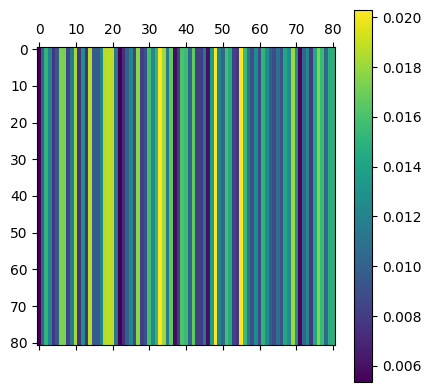

In [10]:
plt.matshow(T)
plt.colorbar()

In [16]:
net_heat = ContTempNetwork.load('fig3_growing_network300')

In [23]:
len(net_heat.laplacians)

18595